In [1]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

# Machine Learning
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data into a Pandas DataFrame
df_market = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file


In [6]:
# Create a DataFrame with the scaled data


# Copy the crypto names from the original data

# Set the coinid column as index


# Display sample data
# initialize
scaler = StandardScaler()

# fit
scaler.fit(df_market)

# predict/transform
scaled_data = scaler.transform(df_market)
df_scaled = pd.DataFrame(scaled_data, columns=df_market.columns)
df_scaled.index = df_market.index

df_scaled.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [7]:
# Create a list with the number of k-values from 1 to 11
X = df_scaled

inertia = []


# Create a a list to store the values of k
k = list(range(2, 11)) # k=1 breaks silhouette score

# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the spread_df DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    # initialize the model
    k_model = KMeans(n_clusters=i, random_state=1)
    
    # fit the model
    k_model.fit(X)
    
    # predict the model
    preds = k_model.predict(X)
    
    # evaluate the model (generate the metics)
    inertia.append(k_model.inertia_)
   
    print(f"Finished {i} out of {max(k)}")



Finished 2 out of 10
Finished 3 out of 10
Finished 4 out of 10
Finished 5 out of 10
Finished 6 out of 10
Finished 7 out of 10
Finished 8 out of 10
Finished 9 out of 10
Finished 10 out of 10


In [8]:
# Create an empty list to store the inertia values


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list


In [9]:
# Create a dictionary with the data to plot the Elbow curve


# Create a DataFrame with the data to plot the Elbow curve
elbow_data_org = {"k1": k, "inertia1": inertia}
df_elbow_org = pd.DataFrame(elbow_data_org)



# Review the DataFrame
df_elbow_org.head(10)

,k1,inertia1
0,2,212.123342
1,3,165.136752
2,4,79.022435
3,5,66.413051
4,6,61.634088
5,7,46.074467
6,8,43.392694
7,9,32.913223
8,10,30.469111


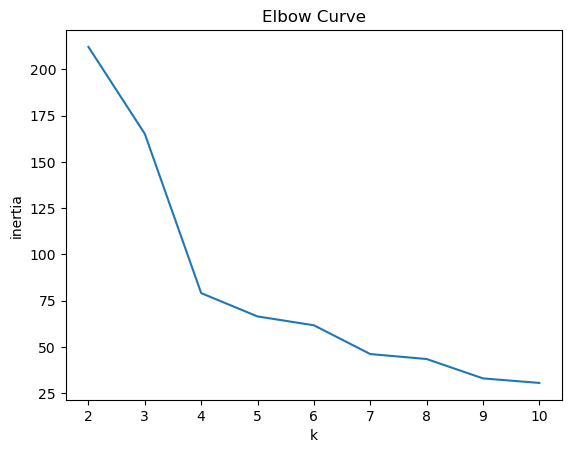

In [10]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.plot(df_elbow_org["k1"], df_elbow_org["inertia1"])
plt.title("Elbow Curve")
plt.xticks(df_elbow_org["k1"])
plt.ylabel("inertia")
plt.xlabel("k")
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [11]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=1)

In [12]:
# Fit the K-Means model using the scaled data
model.fit(X)

KMeans(n_clusters=4, random_state=1)

In [13]:
# Predict the clusters to group the cryptocurrencies using the scaled data
preds = model.predict(X)

# Print the resulting array of cluster values.
print(preds)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [14]:
# Create a copy of the DataFrame
df_sub = df_scaled.copy()

In [15]:
# Add a new column to the DataFrame with the predicted clusters
df_sub['clusters1'] = preds

# Display sample data
df_sub.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters1
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,2
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,2
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,2
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,2


In [16]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

df1 = df_sub

# Create the scatter plot
scatter_plot1 = df1.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    color='clusters1',
    
    hover_cols=['coin_id']  # Add crypto name for hover
)

# Display the plot
scatter_plot1


:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,clusters1,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [17]:
# Create a PCA model instance and set `n_components=3`.
n_components = 3

In [18]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.

# View the first five rows of the DataFrame. 

pca=PCA(n_components=n_components)


pca_data = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(pca_data, columns=["PCA_" + str(x) for x in range(1, n_components + 1)])
df_pca.index=df_scaled.index

df_pca.head()


,PCA_1,PCA_2,PCA_3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [19]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance_ratio = pca.explained_variance_ratio_

explained_variance_ratio


array([0.3719856 , 0.34700813, 0.17603793])

In [20]:
sum(explained_variance_ratio[0:3])

0.8950316570309841

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 90%

In [21]:
# Create a new DataFrame with the PCA data.

# Creating a DataFrame with the PCA data

# Copy the crypto names from the original data


# Set the coinid column as index


# Display sample data
df_pca.head()

,PCA_1,PCA_2,PCA_3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [22]:
X = df_pca

# Create a list with the number of k-values from 1 to 11
k = list(range(2, 11)) # k=1 breaks silhouette score

In [23]:
# Create an empty list to store the inertia values

inertia = []
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    # initialize the model
    k_model = KMeans(n_clusters=i, random_state=1)
    
    # fit the model
    k_model.fit(X)
    
    # predict the model
    preds = k_model.predict(X)
    
    # evaluate the model (generate the metics)
    inertia.append(k_model.inertia_)
   
    print(f"Finished {i} out of {max(k)}")


Finished 2 out of 10
Finished 3 out of 10
Finished 4 out of 10
Finished 5 out of 10
Finished 6 out of 10
Finished 7 out of 10
Finished 8 out of 10
Finished 9 out of 10
Finished 10 out of 10


In [24]:
# Create a dictionary with the data to plot the Elbow curve

# Create a DataFrame with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow_pca = pd.DataFrame(elbow_data)



# Review the DataFrame
df_elbow_pca.head(10)


,k,inertia
0,2,182.339530
1,3,135.442408
2,4,49.665497
3,5,38.672582
4,6,34.507577
5,7,23.728365
6,8,18.574523
7,9,15.572672
8,10,11.407667


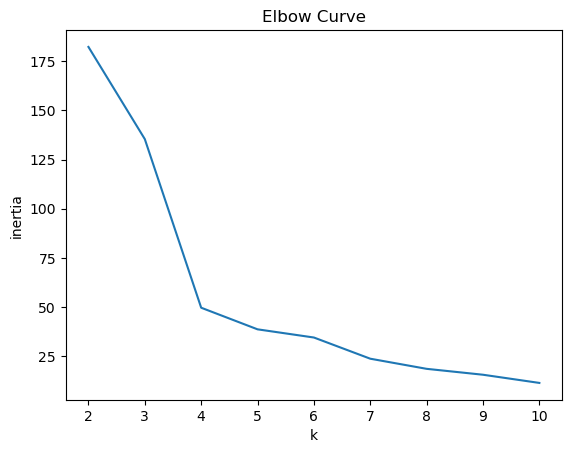

In [25]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.plot(df_elbow_pca["k"], df_elbow_pca["inertia"])
plt.title("Elbow Curve")
plt.xticks(df_elbow_pca["k"])
plt.ylabel("inertia")
plt.xlabel("k")
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** Once again K equaling 4 looks to be best


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** It does not

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [26]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=1)

In [27]:
# Fit the K-Means model using the PCA data
model.fit(X)

KMeans(n_clusters=4, random_state=1)

In [28]:
# Predict the clusters to group the cryptocurrencies using the PCA data
preds = model.predict(X)
# Print the resulting array of cluster values.
print(preds)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [29]:
# Create a copy of the DataFrame with the PCA data
df_sub2 = df_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_sub2['clusters'] = preds

# Display sample data
df_sub2.head()

,PCA_1,PCA_2,PCA_3,clusters
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [30]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

df = df_sub2

# Create the scatter plot
scatter_plot = df.hvplot.scatter(
    x='PCA_1',
    y='PCA_2',
    color='clusters',
    
    hover_cols=['coin_id']  # Add crypto name for hover
)

# Display the plot
scatter_plot



:Scatter   [PCA_1]   (PCA_2,clusters,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [31]:
# Generate the elbow curves
elbow_plot_original = df_elbow_org.hvplot.line(x='k1', y='inertia1', title='Elbow Curve - Original Data', color='blue')
elbow_plot_pca = df_elbow_pca.hvplot.line(x='k', y='inertia', title='Elbow Curve - PCA Data', color='orange')

# Create a composite plot
composite_plot = elbow_plot_original + elbow_plot_pca

# Display the composite plot
composite_plot

:Layout
   .Curve.I  :Curve   [k1]   (inertia1)
   .Curve.II :Curve   [k]   (inertia)

In [32]:
# Composite plot to contrast the clusters
original_clusters_plot = df1.hvplot.scatter(
    x='price_change_percentage_24h', 
    y='price_change_percentage_7d', 
    by='clusters1', 
    title='Original Data Clusters'
)

pca_clusters_plot = df.hvplot.scatter(
    x='PCA_1', 
    y='PCA_2', 
    by='clusters', 
    title='PCA Data Clusters'
)
# Combine the plots using the plus operator:

composite_plot = original_clusters_plot + pca_clusters_plot
# Display the composite plot:

composite_plot

:Layout
   .NdOverlay.I  :NdOverlay   [clusters1]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)
   .NdOverlay.II :NdOverlay   [clusters]
      :Scatter   [PCA_1]   (PCA_2)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** The clusters are closer together which indicates the models performance may be better then the original. Also by using fewer features this lowers the complexity of the model which can provide clearer distinctions between clusters. 